<a href="https://colab.research.google.com/github/sanjida-tasnim/MACHINE-LEARNING/blob/main/Task_03_Neural_Network_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course no:** ETE 456

**course name:** Neural and Fuzzy systems in communications sessional

**Submitted to:** Eftekhar Hossain

**Submitted by:**

**name:** Mahabub-e-sanjida tasnim

**ID:** 1608009

**Level:** 4

**Term:** 2

# **Diabetes Dataset**
**Columns:**

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

**Task:** 

To accurately predict whether a patient is likely to have diabetes or not.

**Objectives:**

1.To predict if a person have diabetes or not by using Deep Neural Network.

2.To develop DNN models using Tensorflow Framework.


In [140]:
import warnings
warnings.filterwarnings("ignore")

**To import libraries:**

In [141]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt

**To download the dataset:**

In [142]:
# Download the data
!wget -O diabetes.csv https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-20 05:08:07--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-20 05:08:07--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc203500f4d96e7cef74f0496b39.dl.dropboxusercontent.com/cd/0/inline/BcJOl3YCjc_DHRBONIy4BjvaEkQX_doEoQDz_KIGTiWj48AZHx0gzrbSEKXscundRw68kQikgLhIZTGj2DD9IbuP-TKe4BK7r3N0BXmTeW1LSwRYjsXCEj3ZTtDA8Xil1kEc01jzwykqqRofJScuI2Pk/file# [following]
--2021-12-20 05:08:07--  https://uc203500f4d96e7cef74f0496b39.dl.dropboxusercontent.com/cd/0/inline/BcJOl3YCjc_DHRBONIy4BjvaEkQX_doEoQDz_KIGTiWj48AZHx0gzrbSEKXscundRw68kQikgLhIZTGj2DD9I

**To import dataset:**

In [143]:
#importing the dataset

dataset_diabetes_pred = pd.read_csv('diabetes.csv')
dataset_diabetes_pred

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [144]:
#To check the total numbers of rows and columns
dataset_diabetes_pred.shape 
#The function "shape" returns the shape of an array.

(768, 9)

In [145]:
#To check the columns in dataset
dataset_diabetes_pred.columns
#The function "columns" returns all the columns in the dataset 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [146]:
#To split data into features and target
features = dataset_diabetes_pred[['Pregnancies'	,'Glucose',	'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]  # for independent
target = dataset_diabetes_pred[['Outcome']]   # for dependent
#Feature are those variable which are used for prediction and Target is the variable that we need to predict.

In [147]:
#To show feature datas
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [148]:
#To show target data
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


# **To check if there is any missing data**

In [149]:
#To check missing data in the columns
#To check if there is any NaN value in the column
pd.isnull(dataset_diabetes_pred.sum)

False

# **Splitting The Dataset**

In [150]:
# Machine learning libraries
from sklearn.model_selection import train_test_split

**The train-test split procedure is used to estimate the performance of machine learning algorithms.** 

In [151]:
#Spliting the Dataset into Training Set and Test Set

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [152]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [153]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [154]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29
482,4,85,58,22,49,27.8,0.306,28
230,4,142,86,0,0,44.0,0.645,22
527,3,116,74,15,105,26.3,0.107,24


# **Feature Scaling**

**Feature scaling is a method used to normalize the range of independent variables or features of data.**

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

# **Neural Network**

# **Import libraries:**

**A Multilayer Neural Network is build with Tensorflow Keras.** 

**Keras is compact, easy to learn, high-level Python library run on top of TensorFlow framework. It is made with focus of understanding deep learning techniques, such as creating layers for neural networks maintaining the concepts of shapes and mathematical details.** 

**Building the architecture of a neural network in Keras is done using the Sequential class.** 

In [157]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **To Bluid a Neural Network Architecture**

In [158]:
#built the neural network architecture
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**Dense function is used to create Neural Network Layer.**

**Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.**

**Since the data we are passing into the model has 8 features, we must define the input_dim parameter in the first layer and set it to 8.**

In [159]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                180       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


# **To Compile the model**

**Binary cross entropy** compares each of the predicted probabilities to actual class output which can be either 0 or 1. It then calculates the score that penalizes the probabilities based on the distance from the expected value. That means how close or far from the actual value.

In [160]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Training the model**

The model was trained on 100 epochs with a validation set of 10% of the train data. The validation set helps to check how well the model is learning during the training process, based on the loss function.

In [161]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
18/18 [==============================] - 1s 23ms/step - loss: 0.6738 - accuracy: 0.6214 - val_loss: 0.6444 - val_accuracy: 0.6613
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6357 - accuracy: 0.6286 - val_loss: 0.6080 - val_accuracy: 0.6774
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6040 - accuracy: 0.6649 - val_loss: 0.5761 - val_accuracy: 0.7097
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5759 - accuracy: 0.7047 - val_loss: 0.5505 - val_accuracy: 0.6935
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5521 - accuracy: 0.7228 - val_loss: 0.5290 - val_accuracy: 0.7258
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5337 - accuracy: 0.7446 - val_loss: 0.5125 - val_accuracy: 0.7258
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 0.5197 - accuracy: 0.7500 - val_loss: 0.5005 - val_accuracy: 0.7581
Epoch 8/100


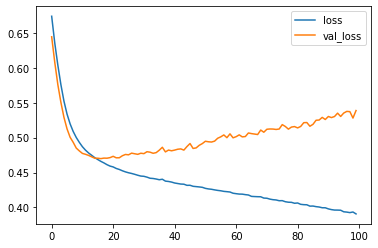

In [162]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

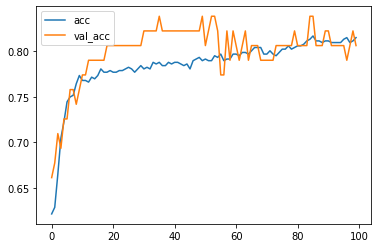

In [163]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')

plt.legend()

In [164]:
#Prediction
y_pred = model.predict(X_test)

In [165]:
y_test

,Outcome
661,1
122,0
113,0
14,1
529,0
...,...
476,1
482,0
230,1
527,0


In [166]:
y_pred

array([[9.67383862e-01],
       [3.67514193e-02],
       [6.47873282e-02],
       [7.36127973e-01],
       [5.65606654e-02],
       [1.23561621e-02],
       [8.69219303e-01],
       [9.18560266e-01],
       [3.57663929e-01],
       [3.00767213e-01],
       [7.70886362e-01],
       [9.52817440e-01],
       [2.02397346e-01],
       [1.77052349e-01],
       [1.80487722e-01],
       [2.59076357e-01],
       [9.33211088e-01],
       [7.92130828e-03],
       [3.26112956e-01],
       [3.99924010e-01],
       [8.26939821e-01],
       [1.40252918e-01],
       [4.62344587e-01],
       [2.47842729e-01],
       [5.64283133e-03],
       [4.80824172e-01],
       [6.40076399e-03],
       [9.25702453e-01],
       [6.51347935e-02],
       [1.13643587e-01],
       [5.03557026e-01],
       [1.30293190e-01],
       [1.69648528e-02],
       [6.84549272e-01],
       [3.88942361e-02],
       [7.63107777e-01],
       [3.70131791e-01],
       [5.52234054e-03],
       [4.20670450e-01],
       [9.03989553e-01],


In [167]:
y_pred = y_pred > 0.5
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

In [168]:
pred = y_pred.astype('uint8')
pred

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

# **Classification Report**

In [169]:
from sklearn.metrics import classification_report

In [170]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       107
           1       0.67      0.60      0.63        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



**The accuracy of this model is 78%.** 

# **To solve the diabetes dataset by using Classification algorithm.**

# **Classification**

To apply various classification algorithms in the diabetes dataset.

In [171]:
import warnings
warnings.filterwarnings("ignore")

**To Import Libraries:**

In [172]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt 

In [173]:
# Download the data
!wget -O diabetes.csv https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-20 05:08:20--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-20 05:08:21--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7aea6a063d43be725c0513d11e.dl.dropboxusercontent.com/cd/0/inline/BcKj5QUVr38iXTUTOlOTYCw522xrbayiEKhsKO_ScsaYsTcnzow4yjbLceIZKp4AlRAJdVDhakX_NA2upejxPOEHx3DDkXp6LPiUxMTto0IoEfrpuRpLR9hIgedTfuDfM2A_eLUCnje8l1CUKeOMpxep/file# [following]
--2021-12-20 05:08:21--  https://uc7aea6a063d43be725c0513d11e.dl.dropboxusercontent.com/cd/0/inline/BcKj5QUVr38iXTUTOlOTYCw522xrbayiEKhsKO_ScsaYsTcnzow4yjbLceIZKp4AlRAJdVDhakX_NA2upejxP

In [174]:
#importing the dataset

dataset_diabetes_pred = pd.read_csv('diabetes.csv')
dataset_diabetes_pred

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Klib**

In [175]:
! pip install klib

In [176]:
import klib

In [177]:
klib.corr_mat(dataset_diabetes_pred) # returns a color-encoded correlation matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


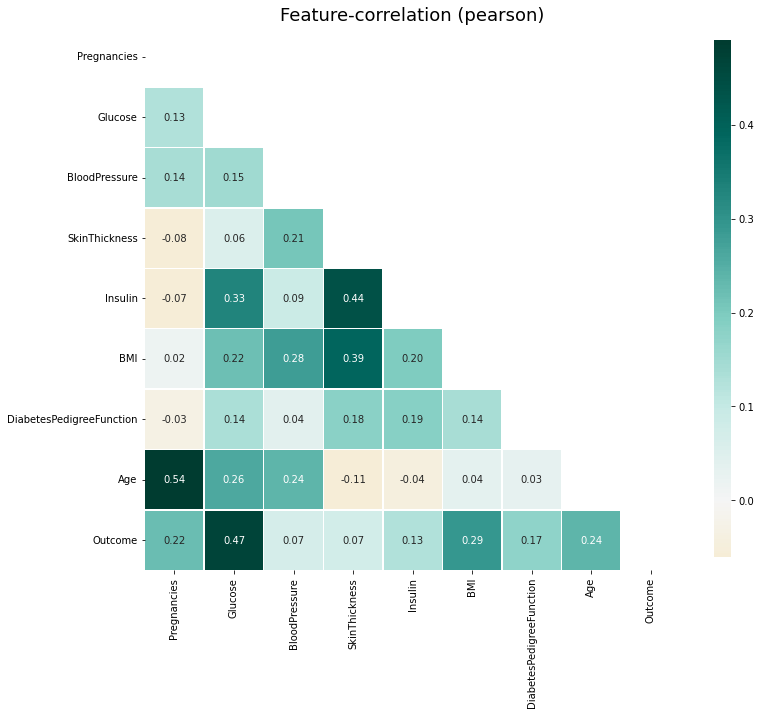

In [178]:
klib.corr_plot(dataset_diabetes_pred)

In [179]:
#To split data into features and target
features = dataset_diabetes_pred[['Pregnancies'	,'Glucose',	'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]  # for independent
target = dataset_diabetes_pred[['Outcome']]   # for dependent
#Feature are those variable which are used for prediction and Target is the variable that we need to predict.

In [180]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [181]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


# **To check if there is any missing data in the dataset**

In [182]:
#To check missing data in the columns
#To check if there is any NaN value in the column
pd.isnull(dataset_diabetes_pred.sum)

False

# **Splitting the dataset**

In [183]:
#Splitting the dataset
# Machine learning libraries
from sklearn.model_selection import train_test_split

In [184]:
#Spliting the Dataset into Training Set and Test Set

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [185]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [186]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [187]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29
482,4,85,58,22,49,27.8,0.306,28
230,4,142,86,0,0,44.0,0.645,22
527,3,116,74,15,105,26.3,0.107,24


# **Feature Scaling**

In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
#feature Scaling
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

# **Logistic Regression**

In [190]:
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [191]:
# prediction
y_pred = lr.predict(X_test)

In [192]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [193]:
# Making confusing matrix (actual,prediction)
confusion_matrix(y_test,y_pred)

array([[98,  9],
       [18, 29]])

**From the array, we can tell that there is 127 correct predictions and 27 incorrect predictions.**

In [194]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.84      0.92      0.88       107
         Yes       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



**The accuracy is 82%**

# **KNN Classifier**

In [195]:
from sklearn.neighbors import KNeighborsClassifier

# Classifier Model
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [196]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[93 14]
 [17 30]]
              precision    recall  f1-score   support

          No       0.85      0.87      0.86       107
         Yes       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



**From the array, we can tell that there is 123 correct predictions and 31 incorrect predictions.**

**The accuracy is 80%**

# **Support Vector Machine**

In [197]:
from sklearn.svm import SVC

# Classifier Model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [198]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[98  9]
 [18 29]]
              precision    recall  f1-score   support

          No       0.84      0.92      0.88       107
         Yes       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



**From the array, we can tell that there is 127 correct predictions and 27 incorrect predictions.**

**The accuracy is 82%**

# **Decision Tree Classifier**

In [199]:
from sklearn.tree import DecisionTreeClassifier
# Classifier Model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [200]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[79 28]
 [17 30]]
              precision    recall  f1-score   support

          No       0.82      0.74      0.78       107
         Yes       0.52      0.64      0.57        47

    accuracy                           0.71       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.73      0.71      0.72       154



**From the array, we can tell that there is 107 correct predictions and 45 incorrect predictions.**

**The accuracy is 71%**

# **Random Forest**

In [201]:
from sklearn.ensemble import RandomForestClassifier
# Classifier Model
classifier = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [202]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[95 12]
 [20 27]]
              precision    recall  f1-score   support

          No       0.83      0.89      0.86       107
         Yes       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154



**From the array, we can tell that there is 122 correct predictions and 32 incorrect predictions.**

**The accuracy is 79%**

# **Naive Bayes**

In [203]:
from sklearn.naive_bayes import GaussianNB

# Classifier Model
classifier = GaussianNB()
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [204]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[93 14]
 [18 29]]
              precision    recall  f1-score   support

          No       0.84      0.87      0.85       107
         Yes       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



**From the array, we can tell that there is 107 correct predictions and 32 incorrect predictions.**

**The accuracy is 79%**